시작 전에 할 것
* Console에 "pip install scanpy" 치고 scanpy 다운로드하기

# Single Cell RNA Sequencing

## Setup and Installation

## Workflow Review

이 노트북은 scRNA-seq 데이터의 컴퓨터 분석에 관한 것입니다. scRNA-seq를 수행하는 데 사용할 수 있는 여러 플랫폼이 있습니다.
* Seurat는 단일 세포 RNA-seq 데이터의 QC, 분석 및 탐색을 위해 설계된 R 패키지입니다.
* Scanpy는 Seurat와 유사한 Python 패키지입니다.

## Data

Tabula Muris는 단일 세포 수준에서 모든 마우스 조직을 프로파일링하는 scRNA-seq 데이터세트입니다. 여기(https://github.com/chanzuckerberg/scRNA-python-workshop/blob/master/content/data.zip) 에서 데이터를 다운로드하고 압축을 풀고 프로젝트 폴더에 넣습니다. 

마우스 두뇌의 Smartseq2 데이터를 사용할 것입니다. 이 데이터는 다음으로 구성됩니다.
1. 각 열이 유전자(또는 전사체)에 해당하고 각 행이 단일 세포에 해당하는 expression matrix
2. 각 셀을 설명하는 metadata 테이블

### Reading the count matrix


In [2]:
# 터미널을 이용해서 pandas를 설치합니다
# pip3 install pandas (MacOS)
! pip3 install scanpy
! pip3 install pandas

import pandas as pd  # DataFrame 작업을 위해 pandas 라이브러리 import

# pandas에게 `brain_counts.csv`의 내용으로 새 DataFrame을 만들라고 지시
# 첫 번째 열을 사용하여 행의 레이블 지정
count_df = pd.read_csv('./data/brain_counts.csv', index_col=0)

# DataFrame의 처음 3 행을 출력
print(count_df.head(3))

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
                         0610005C13Rik  0610007C21Rik  0610007L01Rik  \
A1.B003290.3_38_F.1.1                0            125             16   
A1.B003728.3_56_F.1.1                0              0              0   
A1.MAA000560.3_10_M.1.1              0            348              0   

                         0610007N19Rik  0610007P08Rik  0610007P14Rik  \
A1.B003290.3_38_F.1.1                0              0              0   
A1.B003728.3_56_F.1.1                0              0            324   
A1.MAA000560.3_10_M.1.1              0              0              5   

                         0610007P22Rik  0610008F07Rik  0610009B14Rik  \
A1.B003290.3_38_F.1.1                0              0         

In [3]:
# (N rows, N columns)
# 모양을 물어봄으로써 데이터 세트에 얼마나 많은 유전자와 세포가 있는지 확인할 수 있다
print(count_df.shape)

(3401, 23433)


### Reading the metadata

In [6]:
# pandas에게 `brain_metadata.csv`의 내용으로 새 DataFrame을 만들라고 지시
metadata_df = pd.read_csv('./data/brain_metadata.csv', index_col=0) 

print(metadata_df.head())

print(metadata_df.shape)

                        cell_ontology_class    subtissue mouse.sex mouse.id  \
cell                                                                          
A1.B003290.3_38_F.1.1             astrocyte     Striatum         F   3_38_F   
A1.B003728.3_56_F.1.1             astrocyte     Striatum         F   3_56_F   
A1.MAA000560.3_10_M.1.1     oligodendrocyte       Cortex         M   3_10_M   
A1.MAA000564.3_10_M.1.1    endothelial cell     Striatum         M   3_10_M   
A1.MAA000923.3_9_M.1.1            astrocyte  Hippocampus         M    3_9_M   

                        plate.barcode  
cell                                   
A1.B003290.3_38_F.1.1         B003290  
A1.B003728.3_56_F.1.1         B003728  
A1.MAA000560.3_10_M.1.1     MAA000560  
A1.MAA000564.3_10_M.1.1     MAA000564  
A1.MAA000923.3_9_M.1.1      MAA000923  
(3401, 5)


### Building an AnnData object

데이터 프레임을 체계적으로 유지하기 위해서 AnnData라는 데이터 구조를 사용합니다. AnnData는 분석 라이브러리인 Scanpy에서 사용하는 표준 형식입니다. AnnData는 cell을 observation을로, gene을 variable이라고 표현합니다. 이 데이터 구조에는 정보를 저장할 수 있는 4가지 영역이 있습니다:

1. AnnData.X: count matrix를 저장
2. AnnData.obs: 셀에 대한 메타데이터를 저장
3. AnnData.var: 유전자에 대한 메타데이터를 저장
4. AnnData.uns: 나중에 첨부하기로 결정한 비정형 정보를 저장

카운트 매트릭스에 .X 부분을 사용하고 각 셀을 설명하는 메타데이터에 .obs 부분을 사용합니다.

In [7]:
# 터미널을 이용해서 scanpy를 설치합니다 (시간이 좀 소요됨)
# pip3 install scanpy (MacOS)
import scanpy as sc
adata = sc.AnnData(X = count_df, obs = metadata_df)
print(adata)
print(adata.obs['subtissue'])

/var/folders/fh/5xpsdnyx6h9gcmjzfchyjnrm0000gn/T/ipykernel_13256/3168593362.py:4: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = sc.AnnData(X = count_df, obs = metadata_df)


AnnData object with n_obs × n_vars = 3401 × 23433
    obs: 'cell_ontology_class', 'subtissue', 'mouse.sex', 'mouse.id', 'plate.barcode'
cell
A1.B003290.3_38_F.1.1         Striatum
A1.B003728.3_56_F.1.1         Striatum
A1.MAA000560.3_10_M.1.1         Cortex
A1.MAA000564.3_10_M.1.1       Striatum
A1.MAA000923.3_9_M.1.1     Hippocampus
                              ...     
P9.MAA000926.3_9_M.1.1          Cortex
P9.MAA000930.3_8_M.1.1          Cortex
P9.MAA000932.3_11_M.1.1    Hippocampus
P9.MAA000935.3_8_M.1.1     Hippocampus
P9.MAA001894.3_39_F.1.1         Cortex
Name: subtissue, Length: 3401, dtype: object


### Labeling spike-ins (ERCC)
Smartseq2 데이터에는 spike-in이 있을 수 있으며 이름이 ERCC로 시작하는 유전자를 검색해서 찾을 수 있습니다. 이 정보는 나중에 QC 필터링에 유용합니다.

In [8]:
is_spike_in = {}
num_spike_ins = 0

for gene_name in adata.var_names:
    # ERCC로 시작하는 유전자 검색
    if 'ERCC' in gene_name:
        is_spike_in[gene_name] = True # spike-in을 발견했다고 기록
        num_spike_ins += 1 
    else:
        is_spike_in[gene_name] = False # spike-in을 발견하지 못했다고 기록

adata.var['ERCC'] = pd.Series(is_spike_in) 
print('number of spike ins: ', num_spike_ins)

number of spike ins:  92


모든 세포에서 가장 많이 발현되는 유전자를 한번 보도록 하겠습니다.

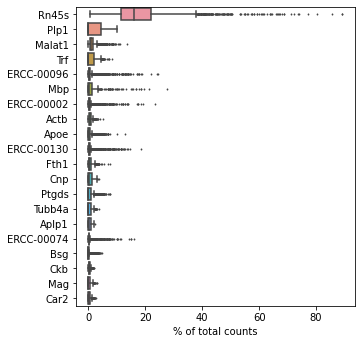

In [9]:
sc.pl.highest_expr_genes(adata, n_top=20, )

AnnData 데이터 구조 생성을 마쳤으므로 나중에 사용할 수 있도록 파일에 저장합니다.

In [10]:
adata.write('./data/brain_raw.h5ad')